# <center> Prediction of Stroke, Based on Patient Risk Factors </center>

## <center> Nikki Fahrenthold </center>
---

### Import Packages and Libraries

In [592]:
# import required packages and libraries
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt

### Load data and create dataframes

In [594]:
# load data

data = 'stroke_data.csv'

In [595]:
# load data into pandas dataframe

df = pd.read_csv(data)

In [596]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,47350,Female,0.080,0,0,No,children,Urban,139.670,14.100,Unknown,0
1,29955,Male,0.080,0,0,No,children,Rural,70.330,16.900,Unknown,0
2,22877,Male,0.160,0,0,No,children,Urban,114.710,17.400,Unknown,0
3,41500,Male,0.160,0,0,No,children,Rural,69.790,13.000,Unknown,0
4,8247,Male,0.160,0,0,No,children,Urban,109.520,13.900,Unknown,0


### Preprocess and Clean the Dataset

In [598]:
# remove id as it is irrelevant for the analysis

column_to_remove = 'id'
df = df.drop(column_to_remove, axis=1)

In [599]:
# look at the first 5 rows of data
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,0.080,0,0,No,children,Urban,139.670,14.100,Unknown,0
1,Male,0.080,0,0,No,children,Rural,70.330,16.900,Unknown,0
2,Male,0.160,0,0,No,children,Urban,114.710,17.400,Unknown,0
3,Male,0.160,0,0,No,children,Rural,69.790,13.000,Unknown,0
4,Male,0.160,0,0,No,children,Urban,109.520,13.900,Unknown,0


### Find and Manage Missing Values

In [601]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [602]:
# we see that there are 201 missing data points for BMI
# when looking at the data on csv, we see that many of the missing BMI values correlate to people who had stroke
# we do not want to remove those from our sample, so we will substitute the average value for the unknown values

column_with_missing_data = 'bmi'

# Calculate the mean of the column
mean_value = df[column_with_missing_data].mean()

# Replace missing values with the mean
df[column_with_missing_data].fillna(mean_value, inplace=True)

# Display the number of missing data points after replacement
print("\nAfter replacing missing values with the mean:")
print(df.isnull().sum())


After replacing missing values with the mean:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [603]:
# for this analysis, we are primarily interested in the rates of stroke among adults
# we will exclude all entries a value of < 18 in the "age" column

df = df[df['age'] >= 18]

In [604]:
# change variables to binary values

# gender (male = 0, female = 1)

df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1, 'Other': 2})

# ever_married (No = 0, Yes = 1)

df['ever_married'] = df['ever_married'].replace({'No': 0, 'Yes': 1})

# work_type (govt_job = 0, private = 2, self-employed = 3)

df['work_type'] = df['work_type'].replace({'children': 0, 'Never_worked': 1, 'Govt_job': 2, 'Private': 3, 'Self-employed': 4})

# Residence_type (Urban = 0, Rural = 1)

df['Residence_type'] = df['Residence_type'].replace({'Urban': 0, 'Rural': 1})

# smoking status (unknown 0, never smoked = 0, formerly smoked = 1, smokes = 2)

df['smoking_status'] = df['smoking_status'].replace({'Unknown': 0, 'never smoked': 0, 'formerly smoked': 1, 'smokes': 2})


## Perform the Exploratory Data Analysis

In [606]:
# get the number of records/rows, and the number of variables/columns

print(df.shape)

(4254, 11)


In [607]:
# get the data types of all variables

print(df.dtypes)

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object


In [608]:
# obtain the summary statistics of the data

print(df.describe())

         gender       age  hypertension  heart_disease  ever_married  \
count 4,254.000 4,254.000     4,254.000      4,254.000     4,254.000   
mean      0.606    50.202         0.117          0.065         0.788   
std       0.489    17.829         0.321          0.246         0.409   
min       0.000    18.000         0.000          0.000         0.000   
25%       0.000    36.000         0.000          0.000         1.000   
50%       1.000    50.500         0.000          0.000         1.000   
75%       1.000    64.000         0.000          0.000         1.000   
max       2.000    82.000         1.000          1.000         1.000   

       work_type  Residence_type  avg_glucose_level       bmi  smoking_status  \
count  4,254.000       4,254.000          4,254.000 4,254.000       4,254.000   
mean       3.034           0.490            108.514    30.367           0.569   
std        0.589           0.500             47.769     7.086           0.782   
min        1.000           

### Create a Histogram

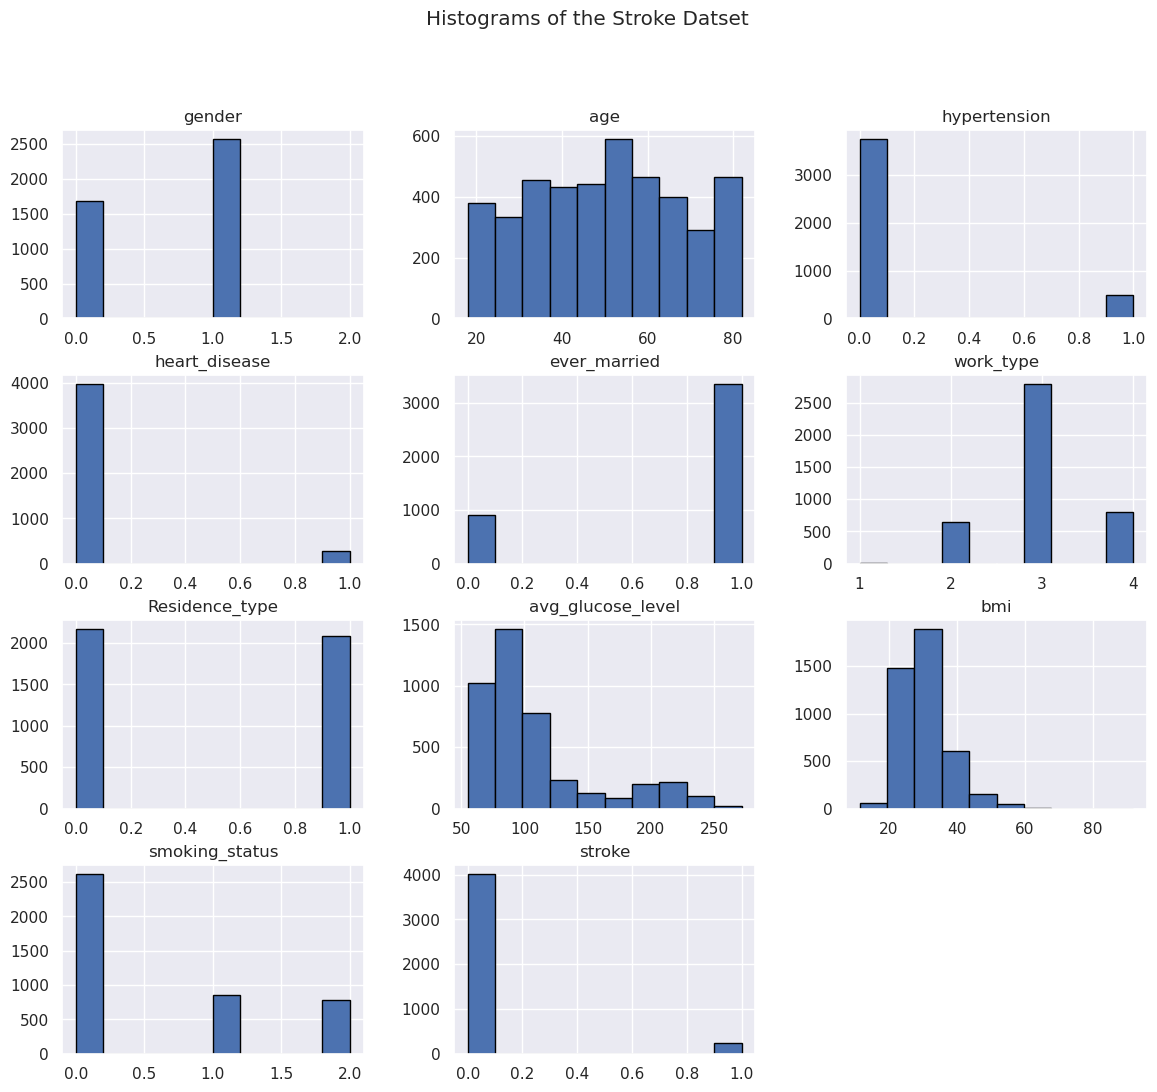

In [610]:
# plot a histogram for each variable

df.hist(edgecolor= 'black', figsize=(14,12))
plt.suptitle("Histograms of the Stroke Datset")
plt.show()

## Create a Box Plot

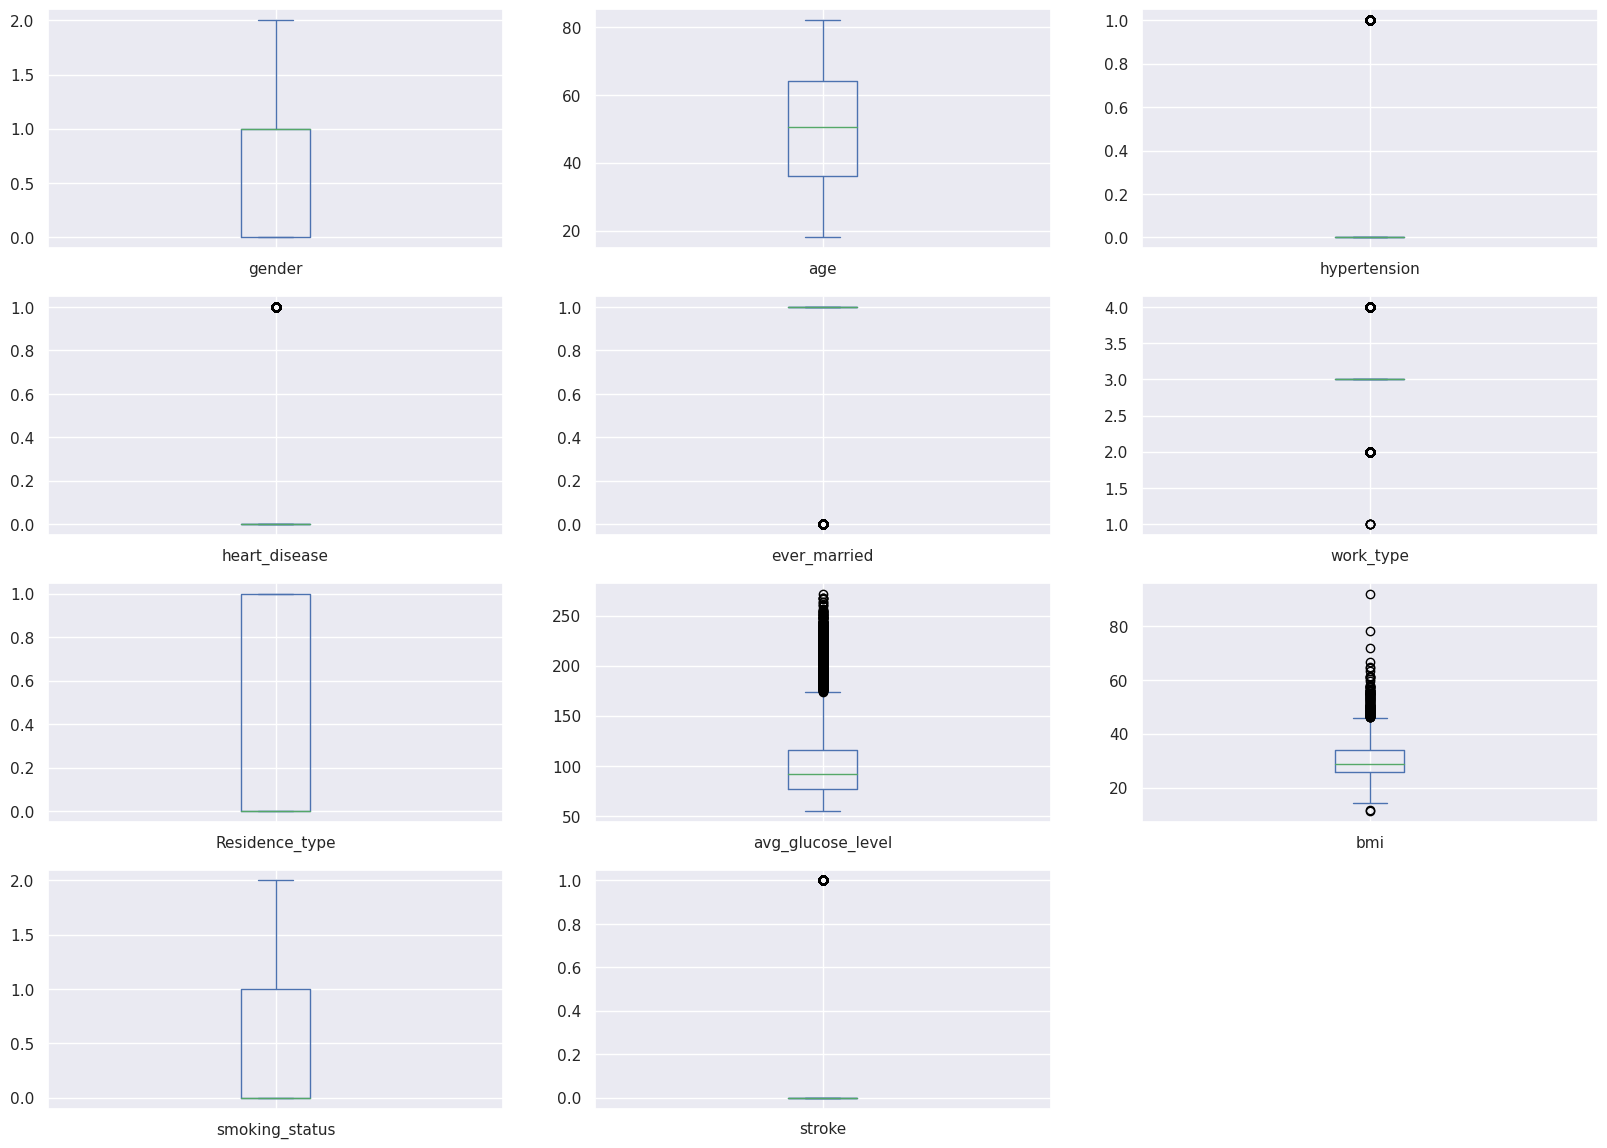

In [612]:
# create a box plot for each variable

df.plot(kind="box", subplots=True, layout=(5,3), sharex=False, figsize=(20,18))
plt.show()

### Correlations

In [614]:
# Set the display format for floating-point numbers
pd.options.display.float_format = '{:,.3f}'.format

# Display the correlations with three decimals
correlation_matrix = df.corr()
print(correlation_matrix)

                   gender    age  hypertension  heart_disease  ever_married  \
gender              1.000 -0.055        -0.038         -0.105        -0.036   
age                -0.055  1.000         0.248          0.269         0.448   
hypertension       -0.038  0.248         1.000          0.095         0.095   
heart_disease      -0.105  0.269         0.095          1.000         0.064   
ever_married       -0.036  0.448         0.095          0.064         1.000   
work_type           0.004  0.186         0.067          0.058         0.053   
Residence_type     -0.011 -0.015         0.009         -0.002        -0.002   
avg_glucose_level  -0.072  0.228         0.166          0.157         0.110   
bmi                -0.021  0.028         0.110         -0.008         0.108   
smoking_status     -0.068  0.014         0.024          0.052         0.037   
stroke             -0.022  0.251         0.116          0.127         0.062   

                   work_type  Residence_type  avg_g

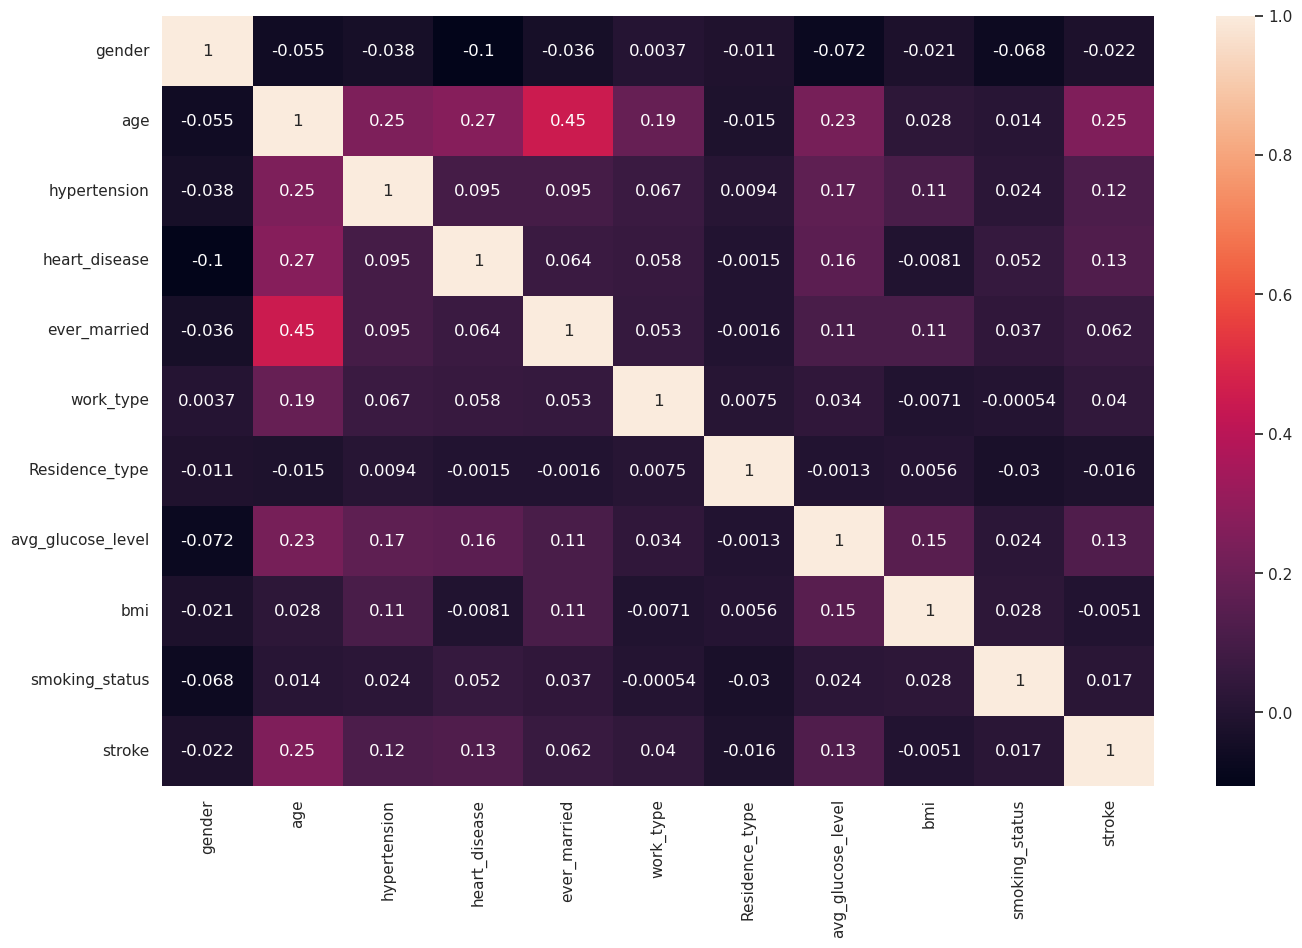

In [615]:
# create heatmap to visualize correlations

plt.figure(figsize =(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [616]:
# narrow down the subset of variables to those with the highest correlation with 'stroke'

df2 = df[['age', 'avg_glucose_level', 'heart_disease', 'stroke']]

In [617]:
# Look at the correlations for only the variables in df2.

df2.corr()

,age,avg_glucose_level,heart_disease,stroke
age,1.000,0.228,0.269,0.251
avg_glucose_level,0.228,1.000,0.157,0.128
heart_disease,0.269,0.157,1.000,0.127
stroke,0.251,0.128,0.127,1.000


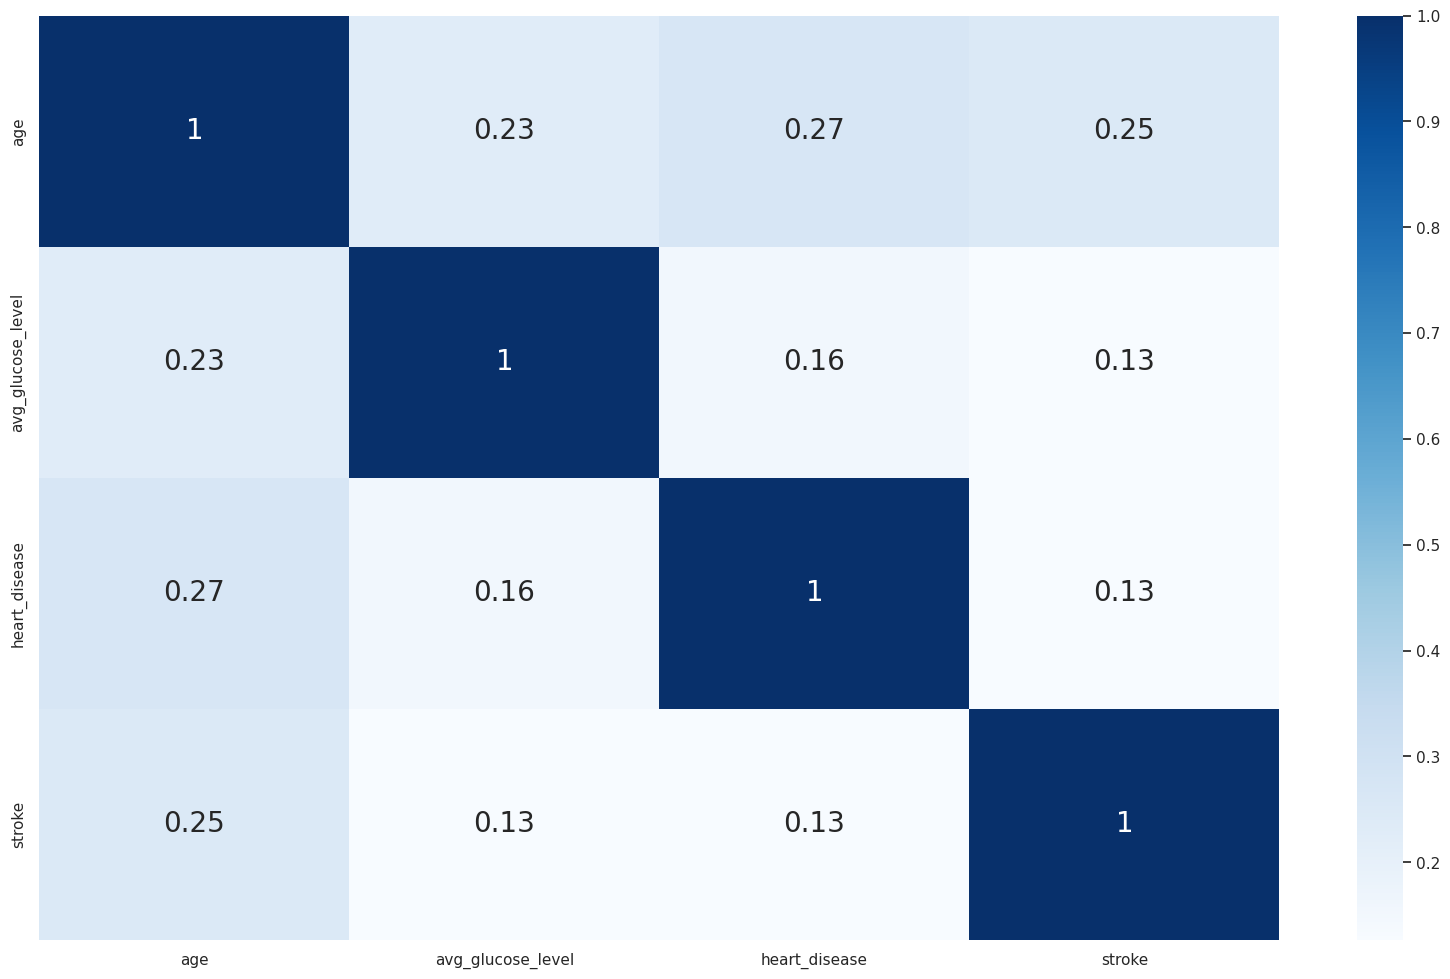

In [618]:
# create heat map with only the variables in df2

plt.figure(figsize =(20,12))
sns.heatmap(df2.corr(), cmap="Blues", annot=True, annot_kws={"fontsize":20})
plt.show()

## Use CART to Generate a Model

Utilizing the CART method should easily provide a result of "1" if the hypothetical patient is likely to have a stroke, or "0" if unlikely to have a stroke.

## Separate Dataset into Input and Output Arrays

In [621]:
# Store the dataframe values into a numPy array

array = df2.values

# Separate the array into input and output components by slicing
# For X (input) [:,3]

X = array [:, 0:3]

# For Y (output) [:3] --> All the rows in the last column (stroke)

Y = array [:,3]

## Split  Input/Output Array into Training/Testing Datasets

In [623]:
# Split the dataset --> training sub-dataset:  67%, and test sub-dataset:  33%

test_size = 0.33

# Selection of records to inclue in which sub-dataset must be done randomly - use the for seed radomization

seed = 7

# Split the dataset (both input & output) into training/testing datasets

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=seed)

## Build and Train the Model

In [625]:
# Build the model
from sklearn.tree import DecisionTreeRegressor

seed = 7

model = DecisionTreeRegressor(random_state=seed)

# Train the model using the training sub-dataset

model.fit(X_train,Y_train)

# Non-Linear --> NO coefficients and the intercept

regressor = DecisionTreeRegressor(
    criterion='mse', 
    max_depth=None, 
    max_features=None,
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    min_samples_leaf=2,
    min_samples_split=2, 
    min_weight_fraction_leaf=0.0, 
    random_state=seed,
    splitter='best'
)

## Calculate R-Squared

In [627]:
R_squared = model.score(X_test, Y_test)
print('R-Squared = ', R_squared)

R-Squared =  -1.12964980421877


## Model Prediction

In [629]:
# use the model to predict whether a patient will have a stroke, when given the following values
# we will use the mean for age, mean for avg_glucose_level, and the highest count for presence of heart_disease
# age: 50.202
# avg_glucose_level: 108.514
# heart_disease: 0 


model.predict([[50.202,108.514,0]])

array([0.])

In [630]:
# use the model to predict whether a patient will have a stroke, when given the following values
# now we will use traditional "higher risk" values for the variables 
# age: 80
# avg_glucose_level: 200
# heart_disease: 1

model.predict([[80,200,1]])

array([1.])

In [631]:
# use the model to predict whether a patient will have a stroke, when given the following values
# now we will use traditional "lower risk" values for the variables
# age: 30
# avg_glucose_level: 55
# heart_disease: 0

model.predict([[30,55,0]])

array([0.])

## Evaluate/Validate Algorithm/Model, Using K-Fold Cross-Validation

In [633]:
# Evaluate the algorithm
# Specify the K-size

num_folds = 10

# Fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated

seed = 7

# Split the whole data set into folds

kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# For Linear regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm

scoring = 'neg_mean_squared_error'

# Train the model and run K-foLd cross-validation to validate/evaluate the model

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation

print("Average of all results from the K-fold Cross Validation, using negative mean squared error:",results.mean())

Average of all results from the K-fold Cross Validation, using negative mean squared error: -0.10114623032311518


## Utilize Linear Regression to Determine the "Level" of Risk

## Separate the dataset into Input and Output NumPy Arrays

In [636]:
from sklearn.model_selection import train_test_split

In [637]:
# Store the dataframe values into a numPy array

array= df2.values

# Separate the array into input and output components by slicing (you used this in your homework)
# For X (input) [:,3] --> All the rows and columns from 0 up to 4

X = array [:, 0:3]

# For Y (output) [:3] --> All the rows in the last column (stroke)

Y = array [:,3]

## Split Input/Output Array into Training/Testing Datasets

In [639]:
# Split the dataset --> training sub-dataset:  67%, and test sub-dataset:  33%

test_size = 0.33

# Selection of records to include in which sub-dataset must be done randomly - use the for seed radomization

seed = 7

# Split the dataset (both input & output) into training/testing datasets
# if random_state = None : Calling the function multiple times will produce different results.
# if random_state = Integer : Will produce the same results across different calls

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=seed)

## Build and Train the Model

In [641]:
# Build the model

model=LinearRegression()

# Train the model using the training sub-dataset

model.fit(X_train, Y_train)

# Print out the coefficients and the intercept
# Print intercept and coefficients
# are the variables statistically significant
# intercept = mean (average) value of Y
# if the value is less than 0.05: there is a strong relationship between the variable and the target  

print ("Intercept:", model.intercept_)
print ("Coefficients:", model.coef_)

Intercept: -0.13503899493849644
Coefficients: [0.00290872 0.00040781 0.08296733]


In [642]:
# If we want to print out the list of the coefficients with their correspondent variable name
# Pair the feature names with the coefficients

names_2 = ["age", "avg_glucose_level", "heart_disease"]

coeffs_zip = zip(names_2, model.coef_)

# Convert iterator into set

coeffs = set(coeffs_zip)

# Print (coeffs)

for coef in coeffs:
    print (coef, "\n")

('avg_glucose_level', 0.0004078076576388834) 

('age', 0.002908718065236412) 

('heart_disease', 0.08296733362860524) 



In [643]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)

LinearRegression(n_jobs=1)

## Calculate R-Squared

In [645]:
R_squared = model.score(X_test, Y_test)
print("R-squared: ", R_squared)

R-squared:  0.009998176178463991


This R-Squared value is not very high, indicating that this is not a very accurate model - despite using the independent variables with the highest correlation.

## Prediction

In [648]:
# use the model to predict the level of risk that a patient will have a stroke, when given the following values
# we will use the mean for age, the highest count for presence of heart_disease, and mean for avg_glucose_level
# age: 50.202
# avg_glucose_level: 108.514
# heart_disease: 0 

model.predict([[50.202,108.514,0]])

array([0.05523731])

The model generates a prediction of 0.055.

A value of "0" would indicate a lower risk of stroke, whereas a higher level would indicate greater risk.

In [650]:
# use the model to predict the level of risk that a patient will have a stroke, when given the following values
# now we will use traditional "higher risk" values for the variables 
# age: 80
# avg_glucose_level: 260
# heart_disease: 1

model.predict([[80,260,1]])

array([0.28665577])

This calculation generated a value higher than the previous calculation. This patient with presence of heart disease, a higher age, and a higher average glucose level has a greater risk of stroke.

Now let's try a model with lesser risk factors to further validate our model.

In [653]:
# use the model to predict whether a patient will have a stroke, when given the following values
# now we will use traditional "lower risk" values for the variables 
# age: 30
# avg_glucose_level: 55
# heart_disease: 0

model.predict([[30,55,0]])

array([-0.02534803])

The value is even lower than the previous calculations, so we assume this hypothetical patient is at an even lower risk of stroke.

## Evaluate using K-Fold

In [656]:
# Evaluate the algorithm
# Specify the K-size

num_folds = 10

# Fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated

seed = 7

# Split the whole data set into folds

kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# For Linear regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm

scoring = 'neg_mean_squared_error'

# Train the model and run K-fold cross-validation to validate/evaluate the model

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation

print("Average of all results from the K-fold Cross Validation, using negative mean squared error:",results.mean())

Average of all results from the K-fold Cross Validation, using negative mean squared error: -0.05101453647435498


In [657]:
# Evaluate the algorithm
# Specify the K-size

num_folds = 10

# Fix the random seed must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated

seed = 7

# Split the whole data set into folds

kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# For Linear regression, we can use explained variance value to evaluate the model/algorithm

scoring = 'explained_variance'

# Train the model and run K-foLd cross-validation to validate/evaluate the model

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation

print("Average of all results from the K-fold Cross Validation, using explained variance:",results.mean())

Average of all results from the K-fold Cross Validation, using explained variance: 0.0639802584605353


## Utilize CART again, but decrease the variables to reduce overfitting

In [659]:
# narrow down the subset of variables to those with the highest correlation with 'stroke'

df2 = df[['age', 'avg_glucose_level', 'stroke']]

In [660]:
# Store the dataframe values into a numPy array

array = df2.values

# Separate the array into input and output components by slicing
# For X (input) [:,2] --> All the rows and columns from 0 up to 2

X = array [:, 0:2]

# For Y (output) [:2] --> All the rows in the last column (stroke)

Y = array [:,2]

In [661]:
# Split the dataset --> training sub-dataset:  67%, and test sub-dataset:  33%

test_size = 0.33

# Selection of records to include in which sub-dataset must be done randomly - use the for seed radomization

seed = 7

# Split the dataset (both input & output) into training/testing datasets
# if random_state = None : Calling the function multiple times will produce different results.
# if random_state = Integer : Will produce the same results across different calls

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=seed)

In [662]:
# Build the model
from sklearn.tree import DecisionTreeRegressor

seed = 7

model = DecisionTreeRegressor(random_state=seed)

# Train the model using the training sub-dataset

model.fit(X_train,Y_train)

# Non-Linear --> NO coefficients and the intercept

regressor = DecisionTreeRegressor(
    criterion='mse', 
    max_depth=None, 
    max_features=None,
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    min_samples_leaf=2,
    min_samples_split=2, 
    min_weight_fraction_leaf=0.0, 
    random_state=seed,
    splitter='best'
)

In [663]:
R_squared = model.score(X_test, Y_test)
print('R-Squared = ', R_squared)

R-Squared =  -1.371502778830365


This R-Squared value is even worse than with a greater number of variables.

Investigate the quality of the data by analyzing how many "1" values are present for stroke compared to "0", as our model may not have enough information to run off of.

In [666]:
# show counts of "1" and "0" in the 'stroke' column
stroke_counts = df['stroke'].value_counts()

print("Counts of '1' and '0' in the 'stroke' column:")
print(stroke_counts)

Counts of '1' and '0' in the 'stroke' column:
stroke
0    4007
1     247
Name: count, dtype: int64


As there are many more values for "0" (indicating that a patient did not have a stroke) our dataset likely does not have enough points on patients who did have a stroke to develop an accurate model. 